## Importación de librerías

In [93]:
# Tratamiento de datos
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

###
 CARGA DE DATOS BANK

In [94]:
df_bank = pd.read_csv('../data/raw/bank-additional.csv', parse_dates= ['date'])

/var/folders/ff/kw20mg9x5ylfh2vjn3h8xmjc0000gn/T/ipykernel_34015/2446293206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bank = pd.read_csv('../data/raw/bank-additional.csv', parse_dates= ['date'])


In [95]:
df_bank.sample(5)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
9013,9110,54.0,entrepreneur,MARRIED,basic.9y,0.0,0.0,1.0,telephone,249,6,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,967","5228,1",no,11-mayo-2015,29.451,-78.317,aafe8c06-1961-4658-9b4c-0e05c7d4ed0c
28098,28242,41.0,blue-collar,MARRIED,basic.9y,0.0,0.0,0.0,cellular,161,1,999,1,FAILURE,-1.8,"93,075","-47,1",NaN,"5099,1",no,11-septiembre-2018,25.509,-87.129,372b4291-328e-4271-b76c-9453b6e61d7a
13632,13729,32.0,blue-collar,MARRIED,basic.4y,NaN,0.0,0.0,cellular,360,17,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,963","5228,1",no,16-febrero-2015,27.730,-118.286,0e8a9961-f9e3-47ff-97de-9c1df14354b2
18948,19045,39.0,admin.,MARRIED,university.degree,0.0,1.0,1.0,cellular,328,1,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,968","5228,1",no,14-julio-2017,27.838,-109.143,b2286441-02af-4b96-873b-c2fe64802155
28679,28823,27.0,admin.,SINGLE,high.school,0.0,0.0,0.0,telephone,198,3,999,0,NONEXISTENT,-1.8,"93,075","-47,1","1,41","5099,1",no,20-octubre-2018,31.787,-67.200,81c06aba-659d-4464-98c9-8740f1b6255a


### Columnas del dataset

- ``age``: La edad del cliente.  
- ``job``: La ocupación o profesión del cliente.  
- ``marital``: El estado civil del cliente.  
- ``education``: El nivel educativo del cliente.  
- ``default``: Indica si el cliente tiene historial de incumplimiento de pagos (1: Sí, 0: No).  
- ``housing``: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).  
- ``loan``: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).  
- ``contact``: Método de contacto utilizado para comunicarse con el cliente.  
- ``duration``: Duración en segundos de la última interacción con el cliente.  
- ``campaign``: Número de contactos realizados durante esta campaña para este cliente.  
- ``pdays``: Número de días desde el último contacto con el cliente en esta campaña.  
- ``previous``: Número de contactos previos antes de esta campaña.  
- ``poutcome``: Resultado de la campaña de marketing anterior.  
- ``emp.var.rate``: Tasa de variación del empleo.  
- ``cons.price.idx``: Índice de precios al consumidor.  
- ``cons.conf.idx``: Índice de confianza del consumidor.  
- ``euribor3m``: Tasa de interés de referencia a tres meses.  
- ``nr.employed``: Número de empleados.  
- ``y``: Indica si el cliente ha suscrito un producto o servicio (Sí/No).  
- ``date``: Fecha en la que se realizó la interacción con el cliente.  
- ``contact_month``: Mes en que se realizó la interacción con el cliente durante la campaña.  
- ``contact_year``: Año en que se realizó la interacción con el cliente durante la campaña.  
- ``id_``: Identificador único de cada registro en el dataset. 

In [96]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [97]:
# Diccionario de meses en español
meses = {
    "enero": "01", "febrero": "02", "marzo": "03", "abril": "04",
    "mayo": "05", "junio": "06", "julio": "07", "agosto": "08",
    "septiembre": "09", "setiembre": "09", "octubre": "10",
    "noviembre": "11", "diciembre": "12"
}

# 1) Separamos la fecha en tres columnas: día, mes escrito, año
df_bank[["day", "monthwrite", "year"]] = df_bank["date"].str.split("-", expand=True)

# 2) Limpiamos espacios y ponemos minúsculas
df_bank["monthwrite"] = df_bank["monthwrite"].str.strip().str.lower()

# 3) Pasamos el mes de texto a número
df_bank["month"] = df_bank["monthwrite"].map(meses)

# 4) Creamos la nueva columna de fecha en formato datetime
df_bank["date"] = pd.to_datetime(
    df_bank["day"] + "-" + df_bank["month"] + "-" + df_bank["year"],
    format="%d-%m-%Y",
    errors="coerce"
)


In [99]:
df_bank = df_bank.drop(columns = ["day", "monthwrite", "year", "month", "month_num", "date_clean"])

KeyError: "['month_num', 'date_clean'] not found in axis"

### Análisis preliminar

Analizando la información, llegamos a la conclusión de:
- Unnamed no aporta información útil, por ello podríamos eliminar la columna
- cons.price.idx, cons.conf.idx, euribor3m, nr.employed -> hay que cambiarlas a columnas numéricas
- age, default, housing, loan, y -> cambiar a enteros Int64 (enteros con NA)
- date -> cambiar a datetime

Podemos observar que hay varias columnas con valores nulos, también varias columnas numéricas mal tipadas con object

In [100]:
# Vamos a eliminar la columna unnamed que no nos aporta información
df_bank = df_bank.drop(columns = ["Unnamed: 0"])


In [101]:
# Modificamos object por columna numérica en aquellas columnas que lo requieren. Para ello también hay que 
# modificar la coma a punto, para que Python lo lea como numérica
colum_coma = ['cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in colum_coma:
    df_bank[col] = (
        df_bank[col].astype(str)
        .str.replace('.', '', regex=False)   # quitamos separador de miles
        .str.replace(',', '.', regex=False)  # coma -> punto decimal
        .astype(float))


In [102]:
df_bank.head()


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,day,monthwrite,year,month
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,2,agosto,2019,08
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,14,septiembre,2016,09
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,15,febrero,2019,02
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,29,noviembre,2015,11
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,29,enero,2017,01


In [103]:
# Observamos cuantas filas y columnas tiene nuestra tabla
df_bank.shape

(43000, 27)

In [104]:
# Visualizamos las estádisticas básicas
df_bank.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,date,latitude,longitude
count,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,42529.000000,43000.000000,33744.000000,43000.000000,42752,43000.000000,43000.000000
mean,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,93.574219,-40.509049,3.616521,5166.852602,2017-07-01 19:55:11.676646656,36.856697,-95.939067
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,2015-01-01 00:00:00,24.396000,-124.997000
25%,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2016-04-01 00:00:00,30.614750,-110.494250
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2017-07-04 00:00:00,36.761000,-95.899500
75%,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,2018-10-01 06:00:00,43.113250,-81.427750
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2019-12-31 00:00:00,49.384000,-66.937000
std,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,0.579548,4.637186,1.737117,72.411125,NaN,7.225948,16.752282


In [105]:
# Revisamos los duplicados 
df_bank.duplicated().sum()

np.int64(0)

In [106]:
nulos_porcentaje = df_bank.isna().mean() * 100
nulos_porcentaje[nulos_porcentaje > 0].sort_values(ascending=False)

euribor3m         21.525581
default           20.886047
age               11.906977
education          4.202326
housing            2.386047
loan               2.386047
cons.price.idx     1.095349
job                0.802326
date               0.576744
day                0.576744
monthwrite         0.576744
year               0.576744
month              0.576744
marital            0.197674
dtype: float64

In [107]:
# Estudiamos cuantos registros distintos hay por año
df_bank['date'].dt.year.value_counts().sort_index()


date
2015.0    8544
2016.0    8533
2017.0    8562
2018.0    8549
2019.0    8564
Name: count, dtype: int64

La variable date cubre campañas desde 2015 hasta 2019, con un volumen de datos muy similar cada año (aprox. 8500 registros por año). Esto asegura que el dataset tiene una buena cobertura temporal y no está desbalanceado hacia un solo año.

A continuación vamos a hacer lo mismo pero con los meses.

In [108]:
df_bank['date'].dt.month.unique()

array([ 8.,  9.,  2., 11.,  1.,  4.,  6.,  3., 10.,  7., 12.,  5., nan])

In [109]:
# Revisamos los nulos que hay en cada columna
df_bank.isna().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
day                248
monthwrite         248
year               248
month              248
dtype: int64

Los porcentajes son relevantes, sobre todo en euribor3m y default. 
Haciendo un análisis para tratar los nulos, se ha realizado el siguiente análsis para tratar los datos:

- age: Tiene un ~12% de valores nulos. Se imputan usando la mediana, ya que es una variable continua y la mediana es robusta frente a outliers (edades muy extremas)
- euribor3m: Presenta un ~21% de nulos. Se decide imputar con la mediana para mantener la distribución general de la variable. No se eliminó la columna porque aporta información económica relevante.
cons.price.idx: Con un ~1% de nulos, se imputa también con la mediana, al ser un indicador económico continuo.
- default: Presenta un ~21% de nulos. Dado que la gran mayoría de valores son 0 y la variable aporta poca variabilidad, los nulos se imputan con la categoría "unknown".
- housing y loan: Ambas con un ~2.4% de nulos. Se imputan con "unknown" para no eliminar filas que podrían aportar información importante.
- education, job, marital: Los nulos son pocos (<5%). Se imputan con "unknown".
- date: Con apenas un 0.5% de nulos, se decide eliminar directamente esas filas para evitar problemas en los análisis temporales.


In [110]:
# Lo primero es definir las listas, una para imputar usando la mediana, y otra lista para modificar el nulo por unknown
c_numericas = ['age', 'euribor3m', 'cons.price.idx'] # para las columnas numéricas se usa la mediana
c_categoricas = ['job', 'marital', 'education', 'housing', 'loan', 'default'] # para las columnas categoricas se usa unknown

# COLUMNAS NUMÉRICAS -> MEDIANA

for colum in c_numericas:
    mediana = df_bank[colum].median()
    df_bank[colum] = df_bank[colum].fillna(mediana)

# COLUMNAS CATEGORICAS -> UNKNOWN

for colum in c_categoricas:
    df_bank[colum] = df_bank[colum].fillna('unknown')

df_bank.sample(3)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,day,monthwrite,year,month
32676,29.0,admin.,DIVORCED,high.school,0.0,1.0,1.0,cellular,78,2,999,1,FAILURE,-1.8,92.893,-46.2,1.299,5099.1,no,2018-12-10,34.793,-97.396,a9e6710f-9419-41d9-aefa-97a374d5369a,10,diciembre,2018,12
37134,19.0,student,SINGLE,basic.9y,0.0,0.0,0.0,cellular,96,1,3,1,SUCCESS,-2.9,92.201,-31.4,0.884,5076.2,no,2017-04-16,31.673,-101.016,9ad42703-6b26-4cc6-a340-ac0377c8d4cb,16,abril,2017,04
11821,32.0,admin.,SINGLE,university.degree,unknown,0.0,0.0,telephone,44,15,999,0,NONEXISTENT,1.4,94.465,-41.8,4.959,5228.1,no,2016-03-21,26.632,-91.018,92018f56-479c-4f30-bedf-b712e039ed07,21,marzo,2016,03


In [111]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             43000 non-null  float64       
 1   job             43000 non-null  object        
 2   marital         43000 non-null  object        
 3   education       43000 non-null  object        
 4   default         43000 non-null  object        
 5   housing         43000 non-null  object        
 6   loan            43000 non-null  object        
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  43000 non-null  float64       
 15  co

In [112]:
# Miramos qué años tienen valores
df_bank['date'].dt.year.unique()


array([2019., 2016., 2015., 2017., 2018.,   nan])

In [113]:
df_bank['date'].dt.year.value_counts().sort_index()

date
2015.0    8544
2016.0    8533
2017.0    8562
2018.0    8549
2019.0    8564
Name: count, dtype: int64

In [114]:
df_bank['date'] = pd.to_datetime(df_bank['date'], errors='coerce')


In [115]:
#Ahora vamos a estudiar cuantos años hay por mes:
# Creamos año y mes como nuevas columnas
df_bank['year'] = df_bank['date'].dt.year
df_bank['month'] = df_bank['date'].dt.month

# Por año
print(df_bank['year'].value_counts().sort_index())

# Por mes (todos los años juntos)
print(df_bank['month'].value_counts().sort_index())

#Ponemos el print para que nos salga el resultado de ambas salidas


year
2015.0    8544
2016.0    8533
2017.0    8562
2018.0    8549
2019.0    8564
Name: count, dtype: int64
month
1.0     3517
2.0     3577
3.0     3589
4.0     3582
5.0     3547
6.0     3538
7.0     3593
8.0     3526
9.0     3569
10.0    3599
11.0    3603
12.0    3512
Name: count, dtype: int64


### ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN DE DATOS

In [116]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### Variables numéricas

In [117]:
# importamos las extensiones necesarias
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
# Vamos a estudiar la variable age para ver como se distribuyen los valores
df_bank['age'].describe()

count    43000.000000
mean        39.741698
std          9.817735
min         17.000000
25%         33.000000
50%         38.000000
75%         46.000000
max         98.000000
Name: age, dtype: float64

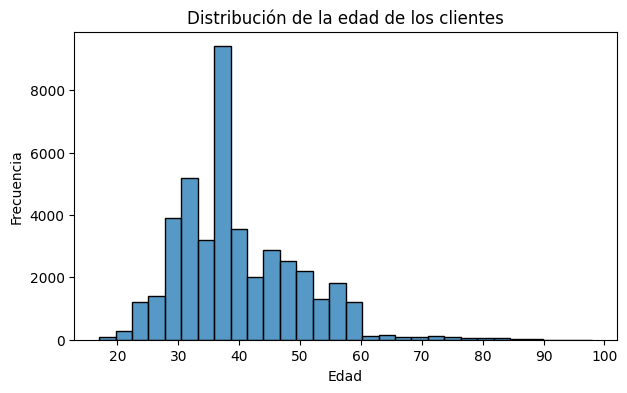

In [119]:
# Realizamos el histograma, para ver los datos de manera visual

plt.figure(figsize=(7,4))
sns.histplot(df_bank['age'], bins=30)
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


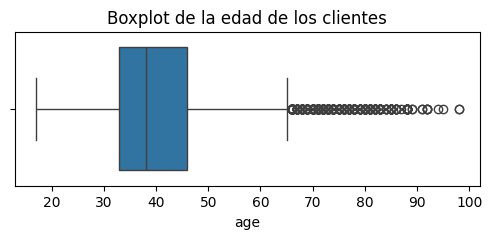

In [120]:
# A continuación estudiamos los outliers con un boxplot
plt.figure(figsize=(6,2))
sns.boxplot(x=df_bank['age'])
plt.title("Boxplot de la edad de los clientes")
plt.show()


Como conclusión del análisis de la columna age, la mayoria de los clientes se concentran en la edad de 39 años (sobre todo entre 30 y 50 años). Como se ve en el gráfico Boxplot, existen outliers que se muetsran como circulos, sin embargo no parecen datos erroneos, simplemente clientes fuera del rango común.

In [121]:
# A continuación estudio la variable duration
df_bank['duration'].describe()

count    43000.000000
mean       257.739279
std        258.666033
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

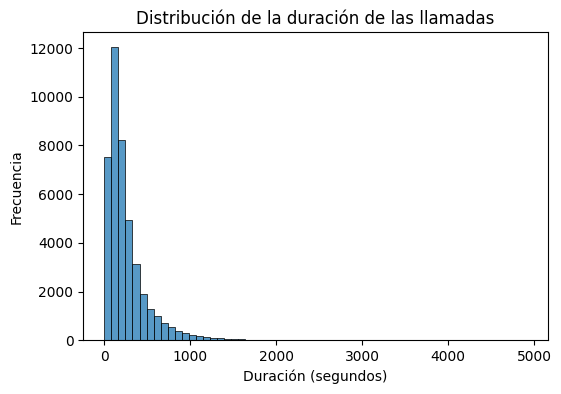

In [122]:
# Dibujamos el histograma
plt.figure(figsize=(6,4))
sns.histplot(df_bank['duration'], bins=60)
plt.title("Distribución de la duración de las llamadas")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.show()


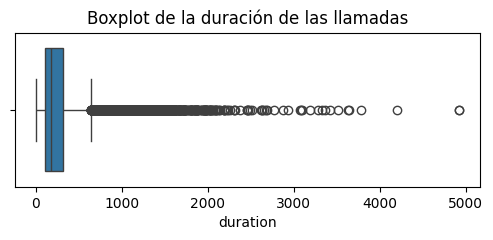

In [123]:
# Realizamos el gráfico Boxplot para ver los outliers
plt.figure(figsize=(6,2))
sns.boxplot(x=df_bank['duration'])
plt.title("Boxplot de la duración de las llamadas")
plt.show()

La mayoria de llamadas son cortas, solo hay casos puntuales de llamadas más largas.
Teniendo en cuenta que los datos que estamos tratando son de una campaña de marketin, habria que tener en cuenta que a mayor duración de la llamada, más posible es la posibilidad de conversión en ella.

In [124]:
# A continuación estudiamos otra variable numérica: variable campaign
df_bank['campaign'].describe()

count    43000.000000
mean         2.567233
std          2.772294
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

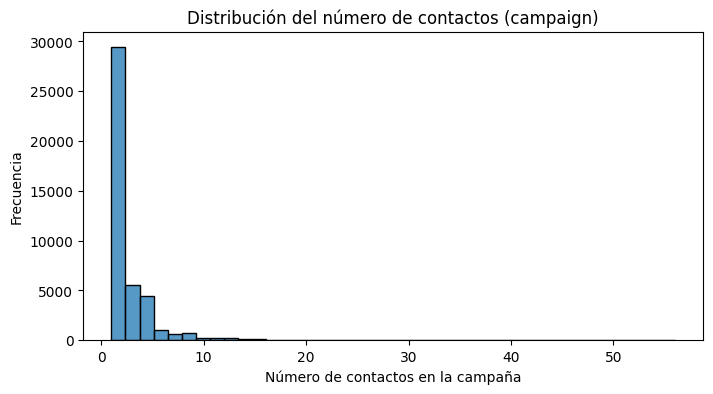

In [125]:
# Dibujamos el histograma
plt.figure(figsize=(8,4))
sns.histplot(df_bank['campaign'], bins=40)
plt.title("Distribución del número de contactos (campaign)")
plt.xlabel("Número de contactos en la campaña")
plt.ylabel("Frecuencia")
plt.show()


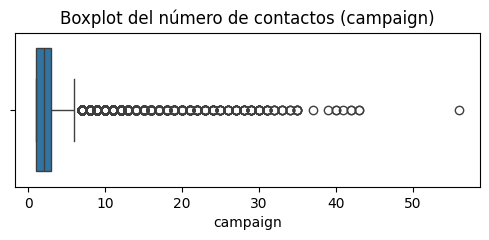

In [126]:
# Realizamos el gráfico Boxplot para ver los outliers
plt.figure(figsize=(6,2))
sns.boxplot(x=df_bank['campaign'])
plt.title("Boxplot del número de contactos (campaign)")
plt.show()

La campaña suele tener pocos intentos de contacto por cliente. Sin embargo, algunos clientes fueron contactados demasiadas veces, lo que podría distorsionar el análisis o indicar prácticas poco eficientes o outliers que hay que eliminar.Por ello vamos a tratar los valores altos como outliers y tratarlos.

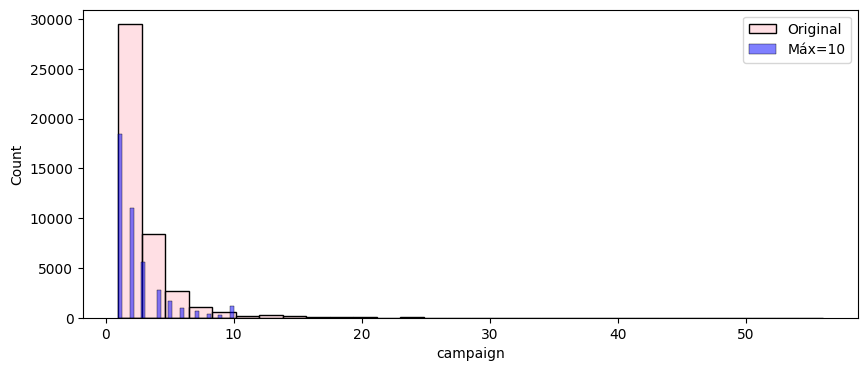

In [127]:
# Ponemos un límite máximo de 10 en la variable campaign
df_bank['campaign_edit'] = df_bank['campaign'].clip(upper=10)

# Comparamos ambas distribuciones
plt.figure(figsize=(10,4))
sns.histplot(df_bank['campaign'], bins=30, color="pink", alpha=0.5, label="Original")
sns.histplot(df_bank['campaign_edit'], bins=30, color="blue", alpha=0.5, label="Máx=10")
plt.legend()
plt.show()


##### Variables categóricas

In [128]:
# Profesiones más frecuentes
print(df_bank['job'].value_counts())

# Estado civil
print(df_bank['marital'].value_counts())

# Educación
print(df_bank['education'].value_counts())


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
unknown        85
Name: count, dtype: int64
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64


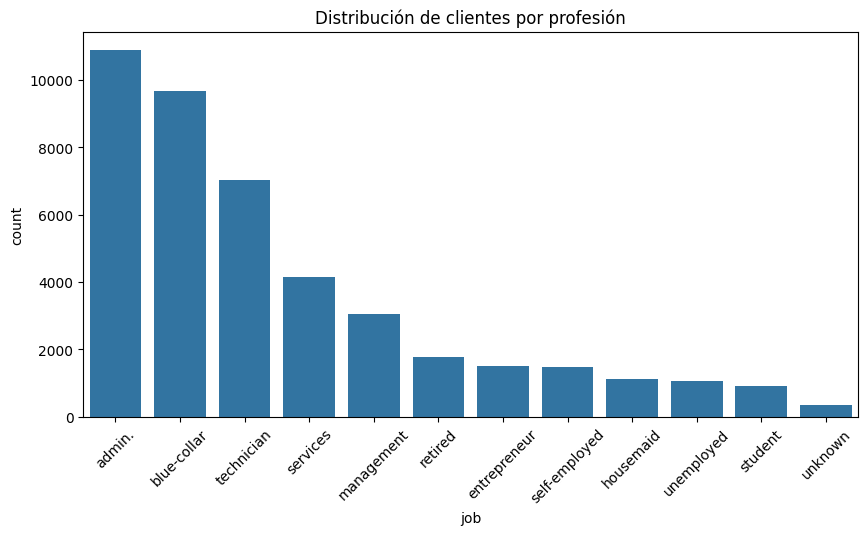

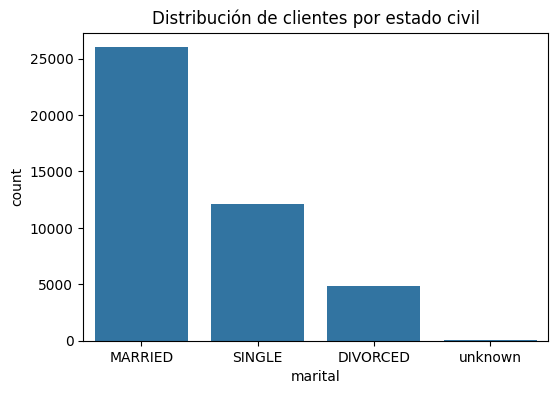

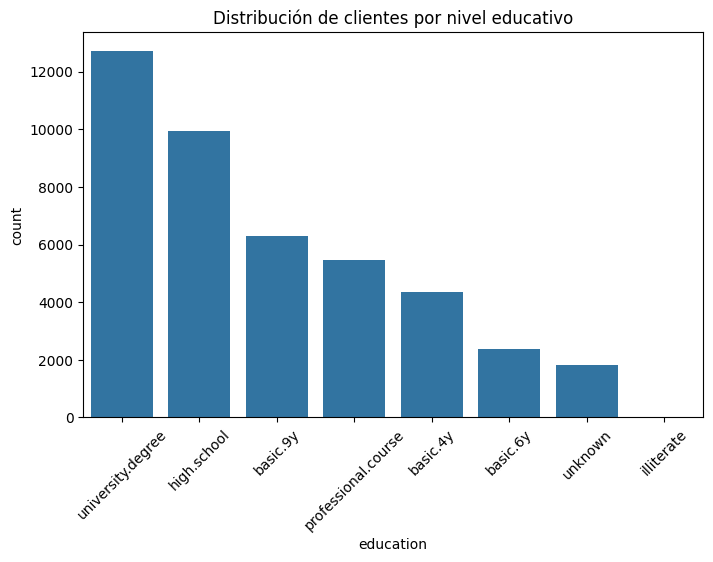

In [129]:
# Profesión
plt.figure(figsize=(10,5))
sns.countplot(data=df_bank, x='job', order=df_bank['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de clientes por profesión")
plt.show()

# Estado civil
plt.figure(figsize=(6,4))
sns.countplot(data=df_bank, x='marital', order=df_bank['marital'].value_counts().index)
plt.title("Distribución de clientes por estado civil")
plt.show()

# Educación
plt.figure(figsize=(8,5))
sns.countplot(data=df_bank, x='education', order=df_bank['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de clientes por nivel educativo")
plt.show()


Las profesiones más comunes son:
- admin. (~11.000 clientes)
- blue-collar (~9.500)
- technician (~7.000)

Estado civil (marital):
- Mayoría married (~26.000, más de la mitad)
- Bastantes single (~12.000)
- Menor proporción de divorced (~5.000)

Nivel educativo (education):
- Predominan university degree (~12.500) y high school (~10.000)
- Con menor peso: basic 9y / 4y / 6y (nivel básico)
- Muy pocos illiterate (casi despreciable)

In [144]:
df_bank = df_bank.drop(columns=['monthwrite'])
df_bank.sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,day,year,month,campaign_edit
31515,35.0,blue-collar,MARRIED,basic.9y,unknown,0.0,0.0,cellular,91,1,999,1,FAILURE,-1.8,92.893,-46.2,4.857,5099.1,no,2019-12-15,30.772,-97.372,739da6af-e739-4642-8008-0981dd7b3874,15,2019.0,12.0,1
13589,38.0,technician,SINGLE,university.degree,0.0,1.0,1.0,cellular,328,1,999,0,NONEXISTENT,1.4,93.918,-42.7,4.963,5228.1,no,2016-05-29,44.419,-84.687,bf2bb17f-f92e-4952-b440-c84621e01c1a,29,2016.0,5.0,1


In [147]:
# Guardamos los datos limpios

df_bank.to_csv("../data/processed/bank-additional_clean.csv", index=False)
